# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [24]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [25]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [26]:
# Mapeia os valores binários para labels
df['sex'] = df['sex'].map({0: 'Male', 1: 'Female'})

# crosstab sex x flag_doente    
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True) 
tab

flag_doente,0,1,All
sex,,,
Female,92,114,206
Male,72,25,97
All,164,139,303


In [27]:
# adicionando quantidade média de doentes
tab['media_doentes'] = tab[1] / tab['All']

# adicionando odds
tab['odds'] = tab[1] / tab[0]

# adicionando odds ratio        
tab['odds_ratio'] = tab['odds'] / tab['odds']['All']

# adicionando logito
tab['logito'] = np.log(tab['odds']) 

# adicionando WOE   
tab['WOE'] = np.log(tab['odds_ratio'])  

tab

flag_doente,0,1,All,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
Female,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
Male,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [28]:
# Dividir a variável age em 5 grupos com quantidades aproximadamente iguais
age_bins = pd.qcut(df['age'], q=5)

# Criar rótulos para cada grupo com base nos valores mínimo e máximo de idade no grupo
age_labels = age_bins.apply(lambda x: f'{int(x.left)}-{int(x.right)}')

# Adicionar a nova coluna ao DataFrame
df['age_cat'] = age_labels

# crosstab age_cat x flag_doente
tab_age = pd.crosstab(df['age_cat'], df['flag_doente'], margins=True)   

# calculando as mesmas quantidades calculadas no exercício anterior 
tab_age['media_doentes'] = tab_age[1] / tab_age['All']  
tab_age['odds'] = tab_age[1] / tab_age[0]
tab_age['odds_ratio'] = tab_age['odds'] / tab_age['odds']['All']
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])
tab_age

flag_doente,0,1,All,media_doentes,odds,odds_ratio,logito,WOE
age_cat,,,,,,,,
28-45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
45-53,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
53-58,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
58-62,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
62-77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

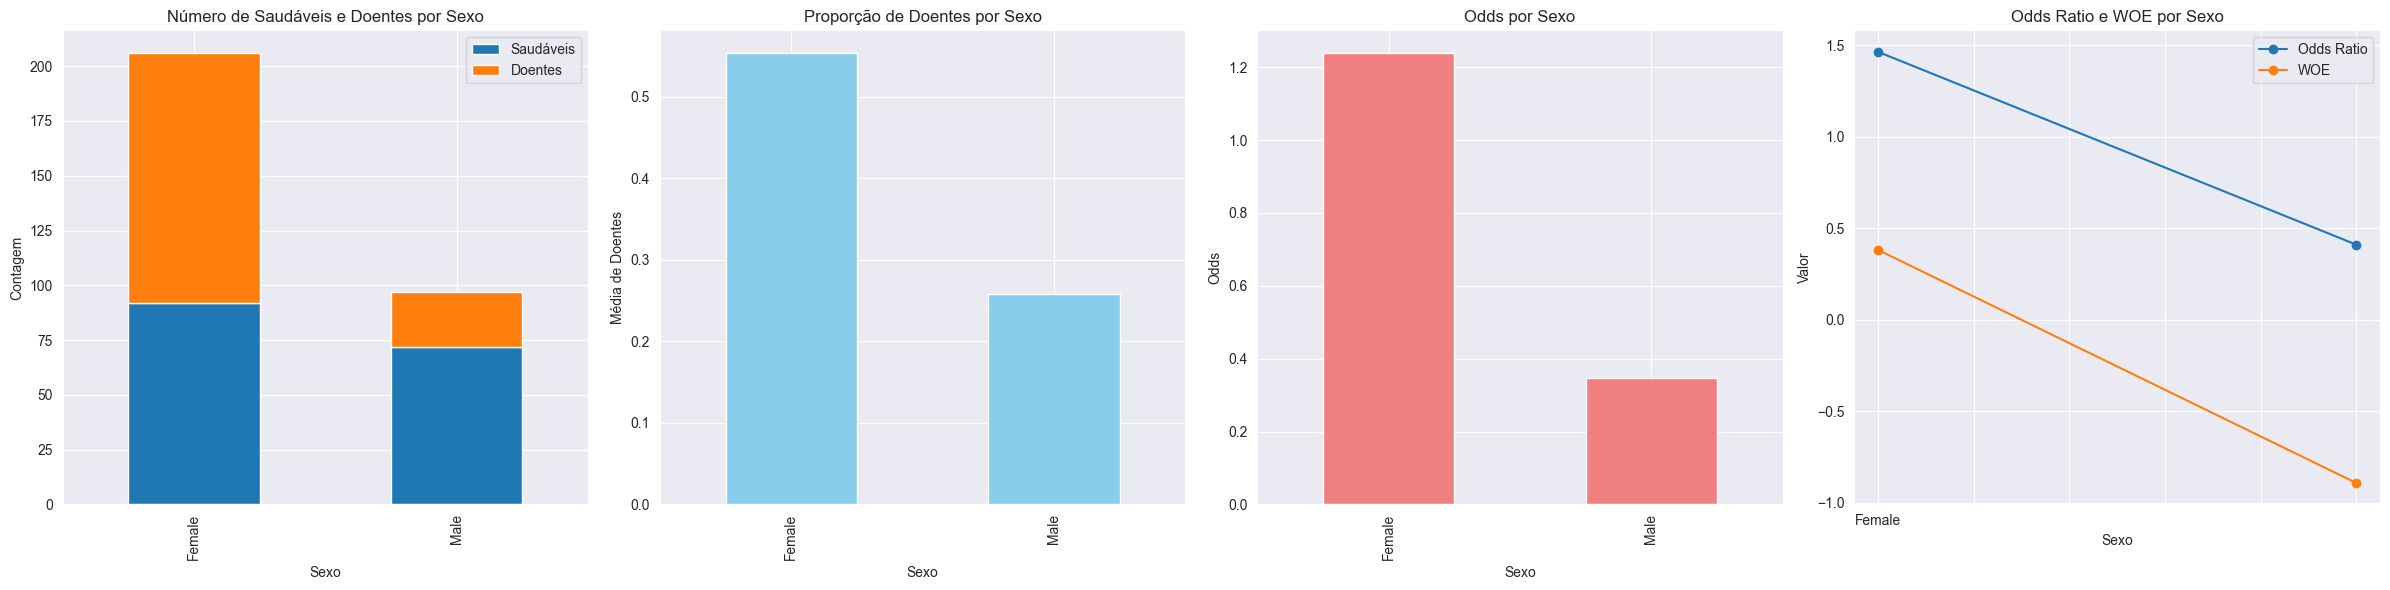

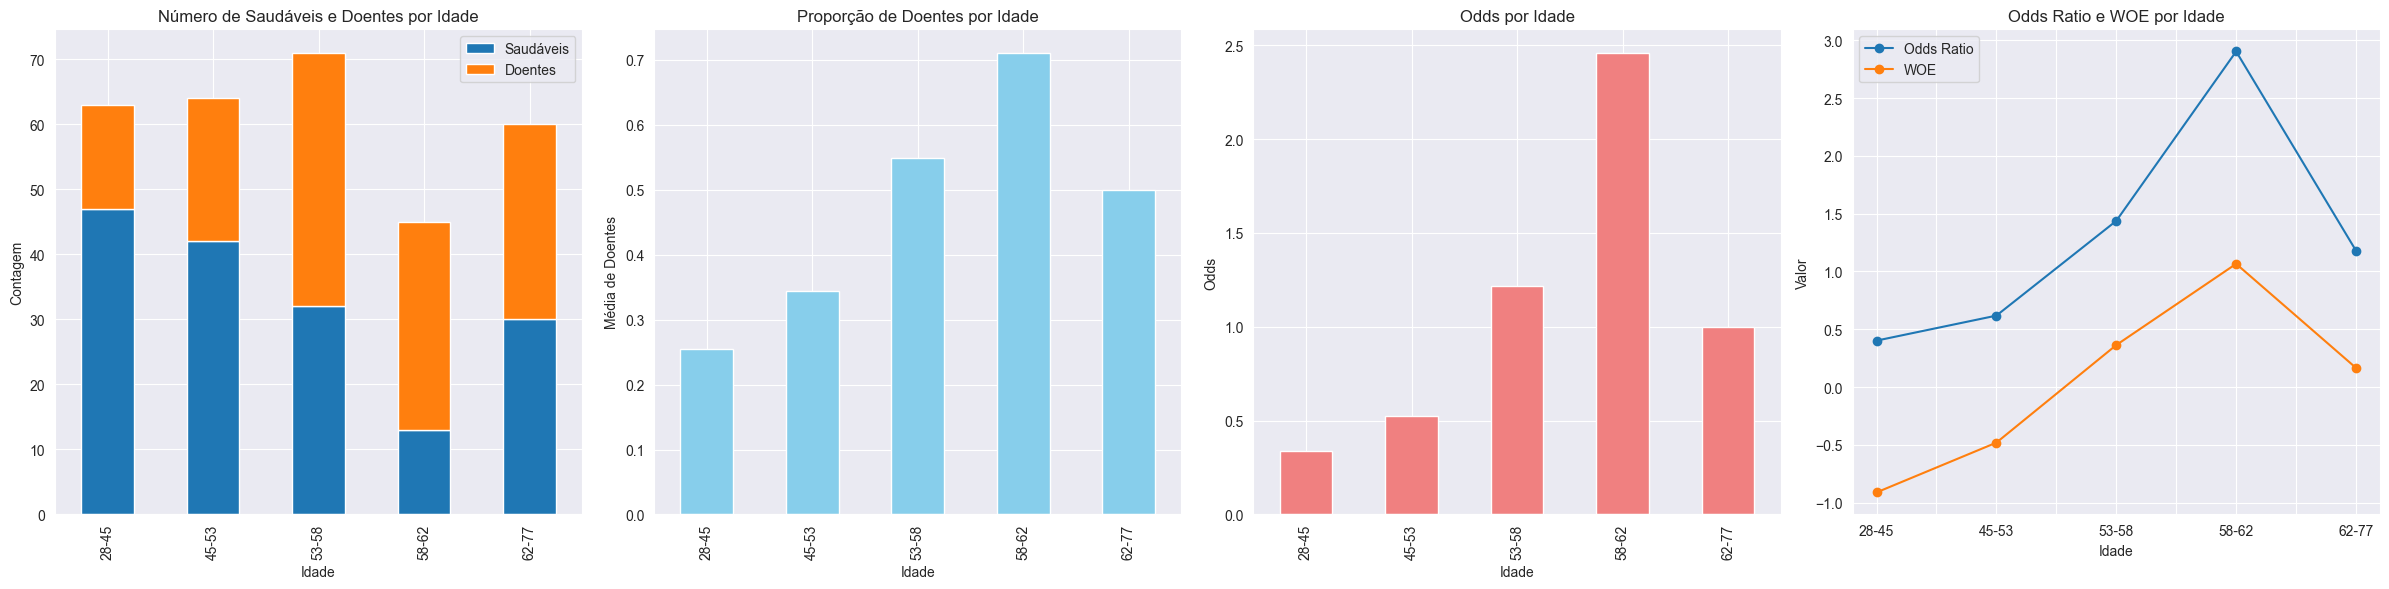

In [38]:
def plot_crosstab_analysis(tab, column):
     # Visualizações
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))

    # Gráfico de Barras Empilhadas para Saudáveis e Doentes
    tab.iloc[:-1, :2].plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'Número de Saudáveis e Doentes por {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Contagem')
    axes[0].legend(['Saudáveis', 'Doentes'])

    # Gráfico de Barras para Média de Doentes
    tab['media_doentes'].iloc[:-1].plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title(f'Proporção de Doentes por {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Média de Doentes')

    # Gráfico de Barras para Odds
    tab['odds'].iloc[:-1].plot(kind='bar', ax=axes[2], color='lightcoral')
    axes[2].set_title(f'Odds por {column}')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Odds')

    # Gráfico de Linhas para Odds Ratio e WOE
    tab.iloc[:-1][['odds_ratio', 'WOE']].plot(ax=axes[3], marker='o')
    axes[3].set_title(f'Odds Ratio e WOE por {column}')
    axes[3].set_xlabel(column)
    axes[3].set_ylabel('Valor')
    axes[3].legend(['Odds Ratio', 'WOE'])

    plt.tight_layout()
    plt.show()

plot_crosstab_analysis(tab, 'Sexo')
plot_crosstab_analysis(tab_age, 'Idade')